In [2]:
import yfinance as yf
import pandas as pd

In [ ]:
#Importing the dataframe of Cyrela Company

In [3]:
df = yf.download('CYRE3.SA', start='2000-01-01', interval='1D')

[*********************100%***********************]  1 of 1 completed


In [6]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-17,0.6000,0.6000,0.6000,0.6000,0.370714,32000
2000-01-20,0.6000,0.6000,0.6000,0.6000,0.370714,1160000
2000-01-24,0.6325,0.6875,0.6325,0.6875,0.424777,16000
2000-01-31,0.6750,0.6750,0.6750,0.6750,0.417054,8000
2000-02-02,0.6750,0.6750,0.6500,0.6500,0.401607,24000


In [5]:
#We only need the 'close' column, so we'll drop the others

In [7]:
df =df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)

In [8]:
df.head()

,Close
Date,
2000-01-17,0.6000
2000-01-20,0.6000
2000-01-24,0.6875
2000-01-31,0.6750
2000-02-02,0.6500


In [ ]:
#Creating the 'peaks' column

In [9]:
df['peaks'] = df['Close'].cummax()
df

,Close,peaks
Date,,
2000-01-17,0.600000,0.600000
2000-01-20,0.600000,0.600000
2000-01-24,0.687500,0.687500
2000-01-31,0.675000,0.687500
2000-02-02,0.650000,0.687500
...,...,...
2023-06-01,18.950001,34.380001
2023-06-02,19.200001,34.380001
2023-06-05,19.129999,34.380001


<AxesSubplot:xlabel='Date'>

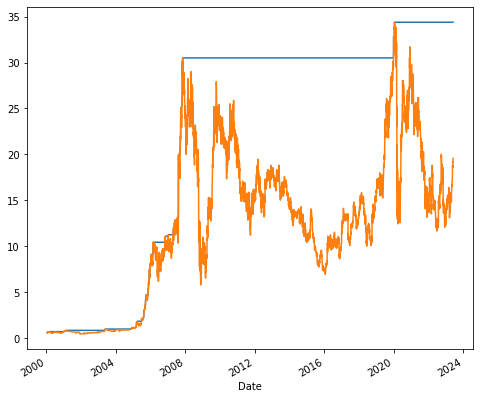

In [10]:
df['peaks'].plot(figsize=(8,7))
df['Close'].plot(figsize=(8,7))

In [11]:
#Creating the drawdown

In [12]:
df['drawdown'] = ((df['Close'] - df['peaks']) / df['peaks']) * 100
df

,Close,peaks,drawdown
Date,,,
2000-01-17,0.600000,0.600000,0.000000
2000-01-20,0.600000,0.600000,0.000000
2000-01-24,0.687500,0.687500,0.000000
2000-01-31,0.675000,0.687500,-1.818180
2000-02-02,0.650000,0.687500,-5.454549
...,...,...,...
2023-06-01,18.950001,34.380001,-44.880744
2023-06-02,19.200001,34.380001,-44.153577
2023-06-05,19.129999,34.380001,-44.357189


<AxesSubplot:xlabel='Date'>

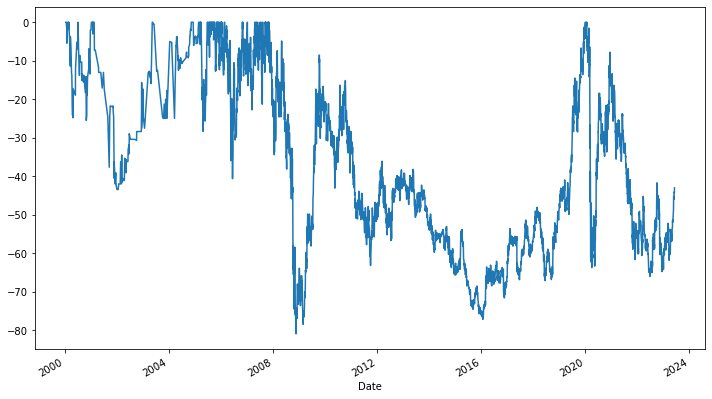

In [14]:
df['drawdown'].plot(figsize=(12,7))